In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
data= pd.read_csv('/content/Thyroid_Diff.csv')
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [2]:
print(data.describe())

print(data.info())

              Age
count  383.000000
mean    40.866841
std     15.134494
min     15.000000
25%     29.000000
50%     37.000000
75%     51.000000
max     82.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 no

In [3]:

data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [4]:
data.shape

(383, 17)

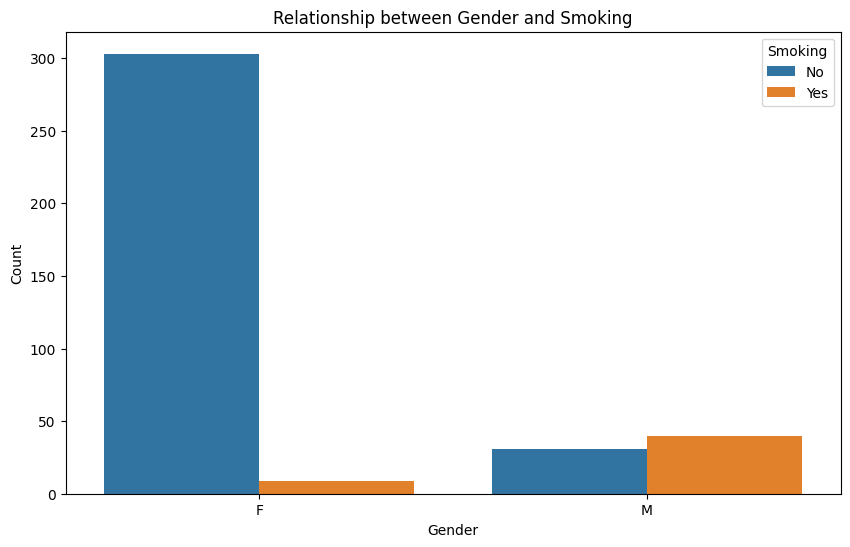

In [5]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Smoking', data=data)
plt.title("Relationship between Gender and Smoking")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Smoking", loc="upper right")
plt.show()



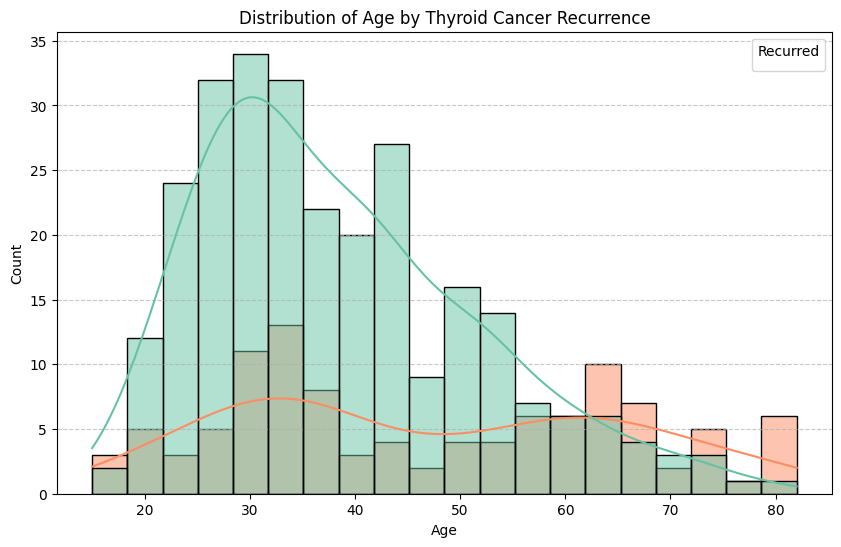

In [11]:



plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Recurred', kde=True, palette='Set2', bins=20)
plt.title('Distribution of Age by Thyroid Cancer Recurrence')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Recurred', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


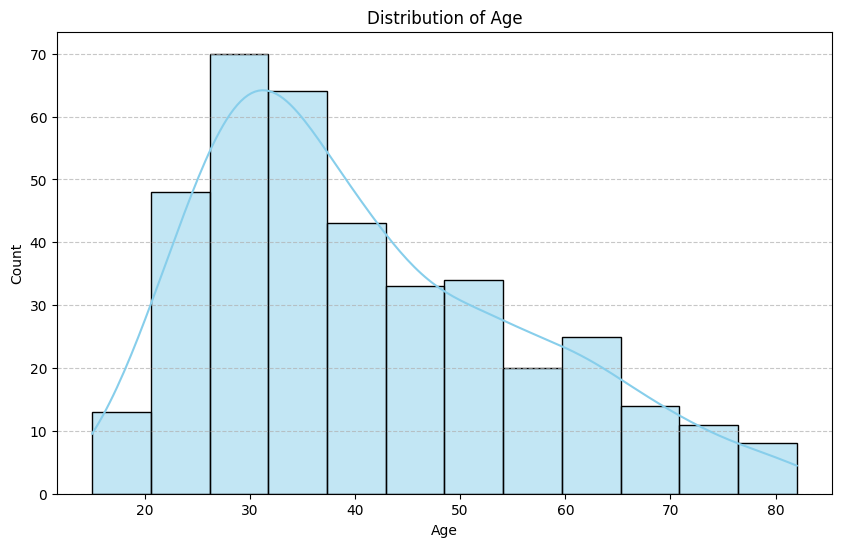

<ipython-input-15-b0d202aac89a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Recurred', y=feature, palette='Set2')


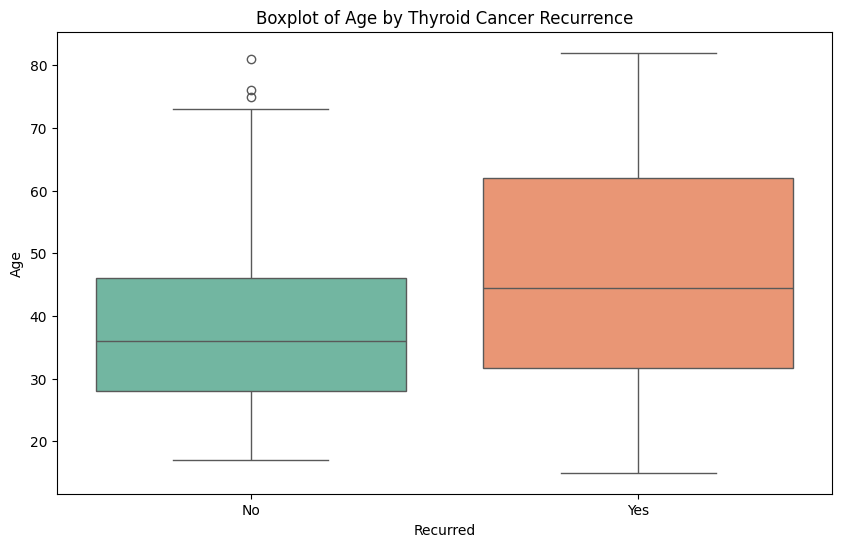

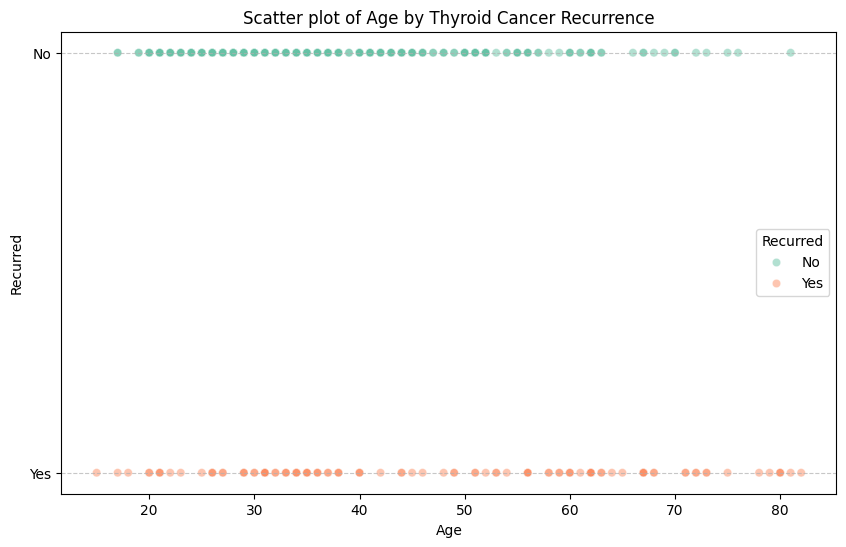

<ipython-input-15-b0d202aac89a>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Recurred', y=feature, palette='Set2')


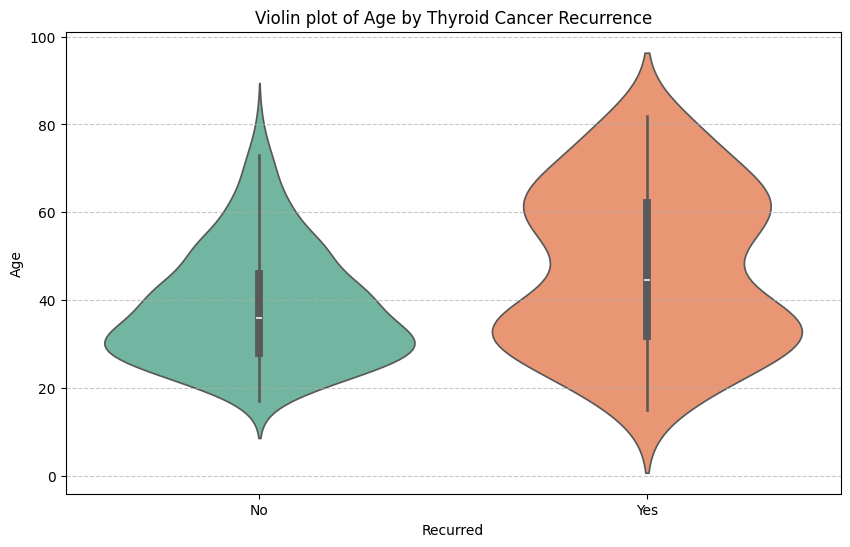

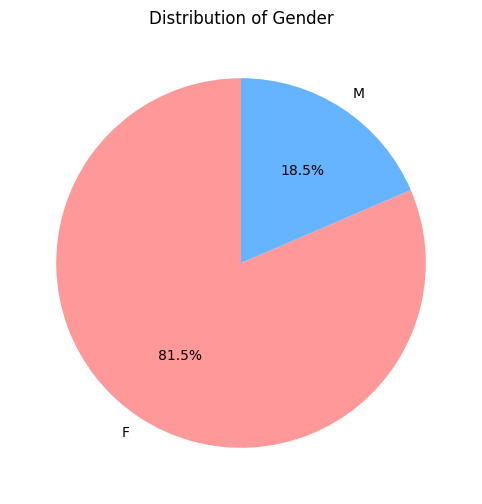

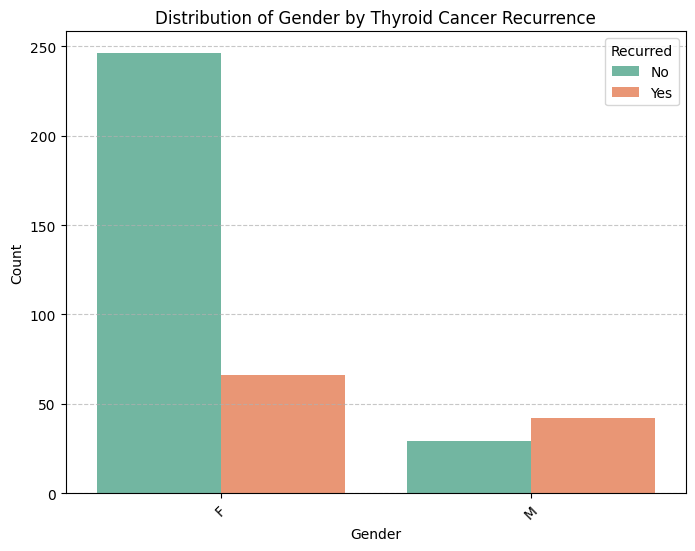

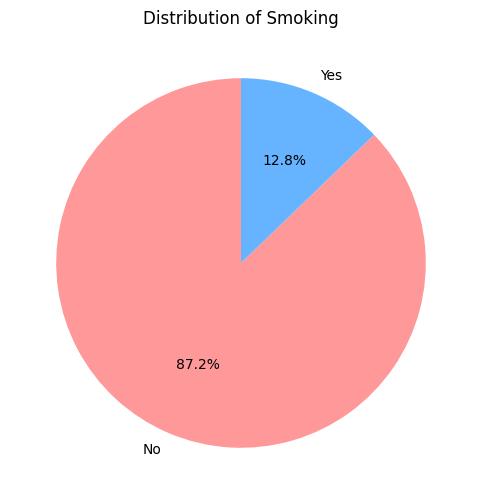

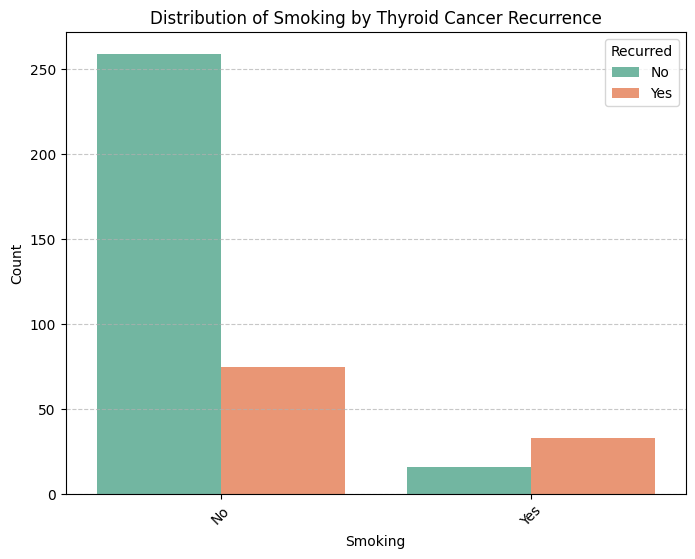

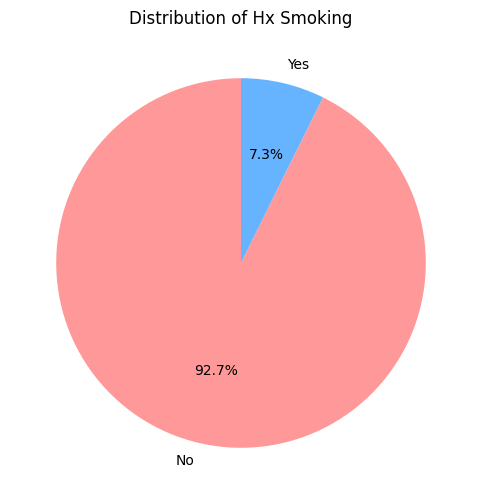

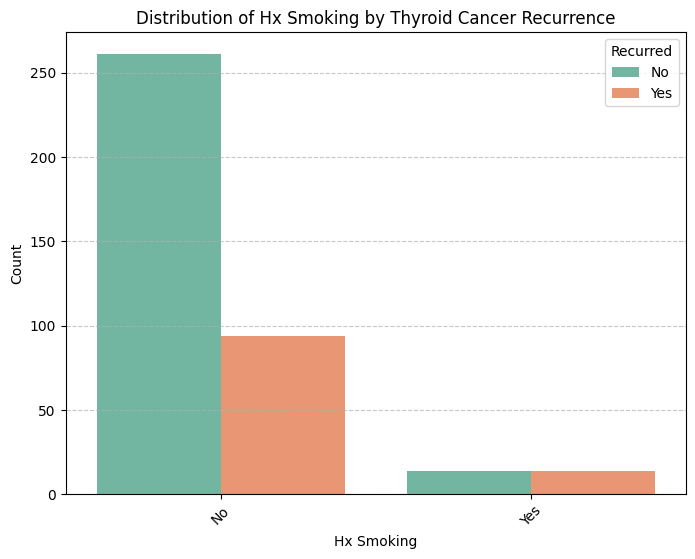

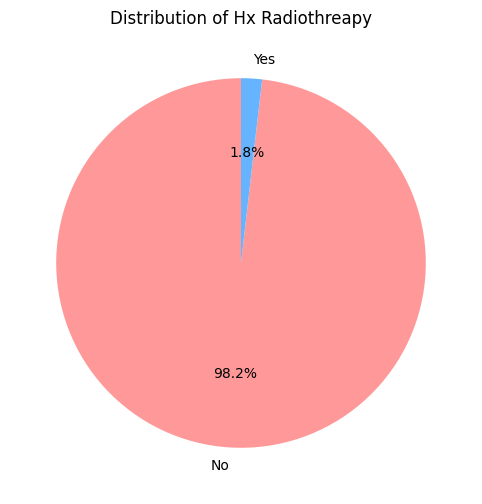

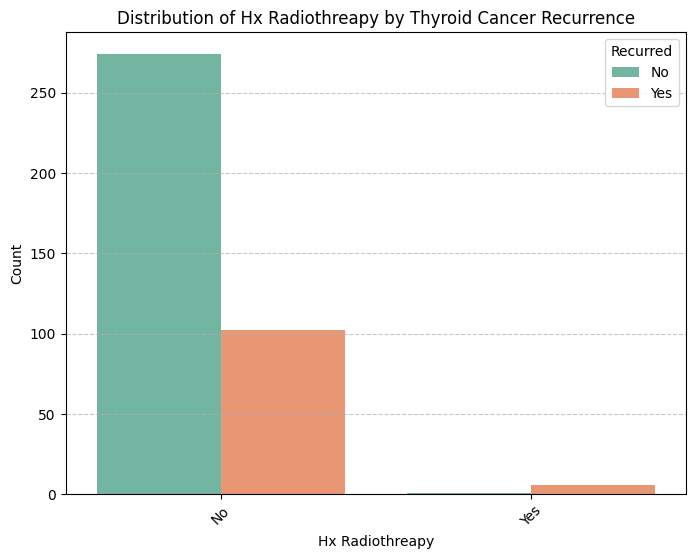

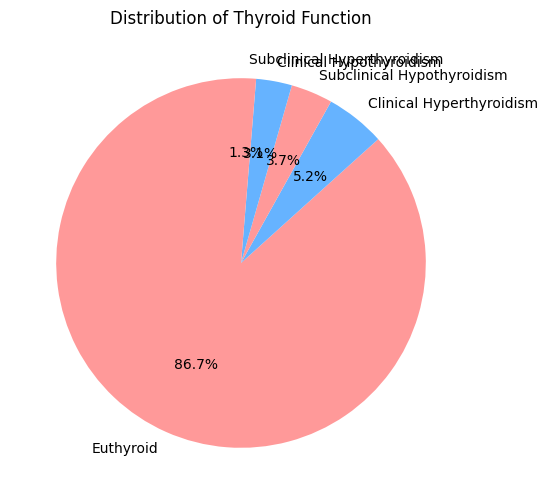

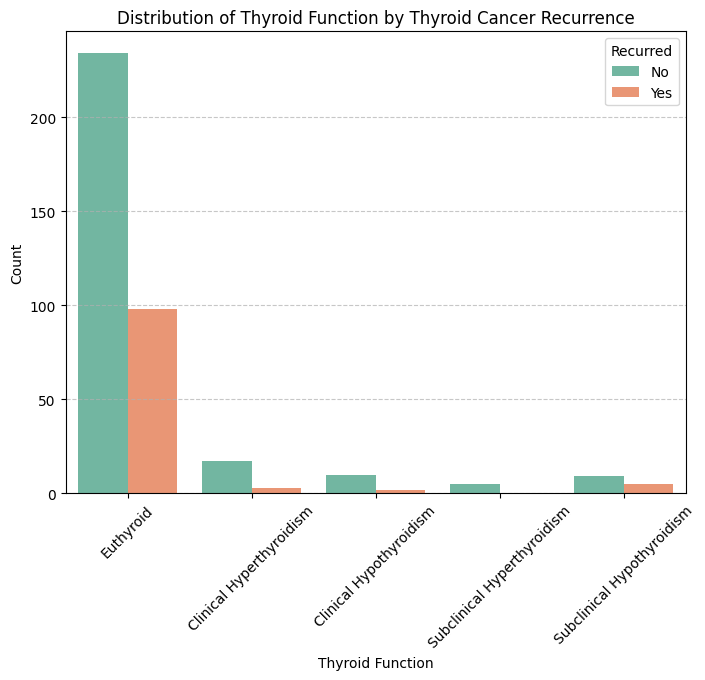

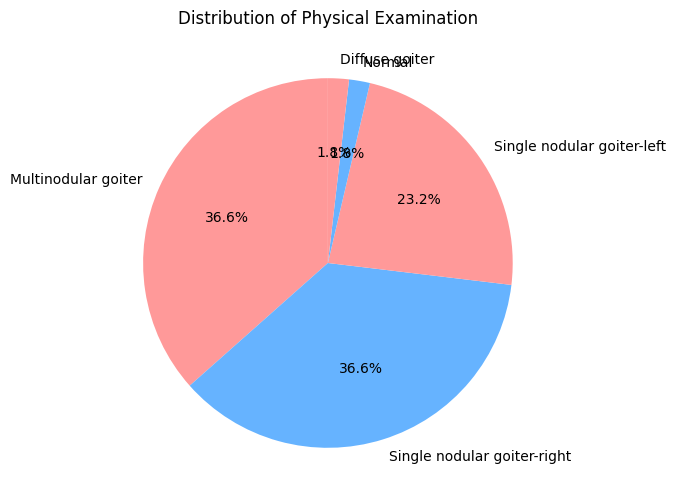

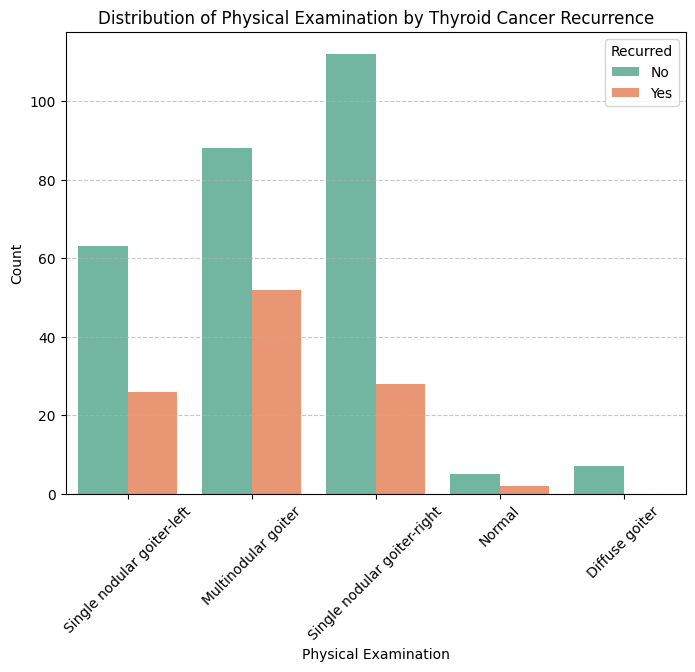

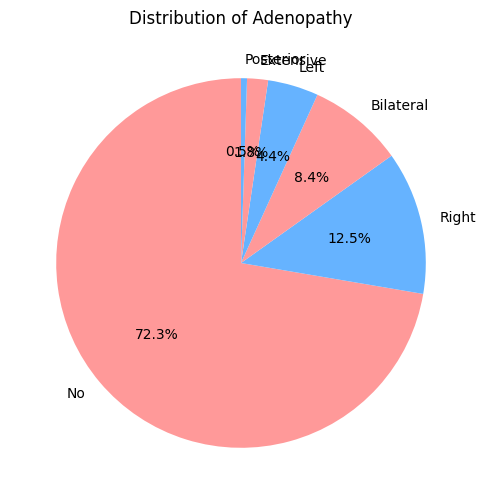

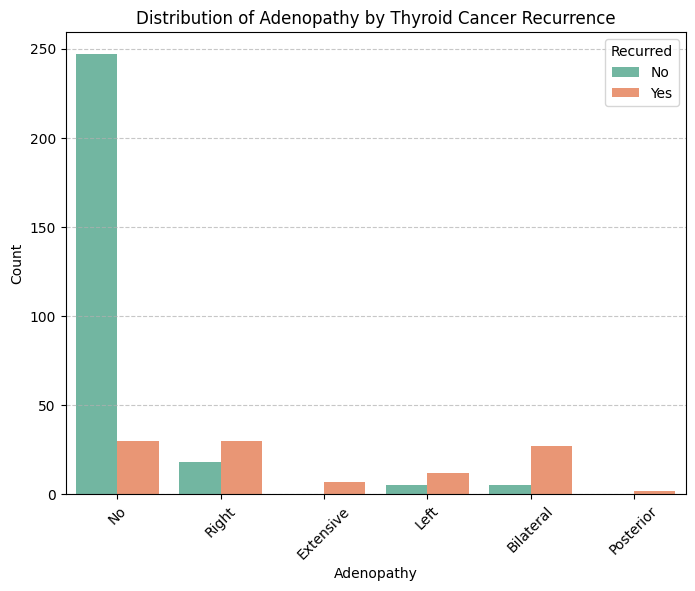

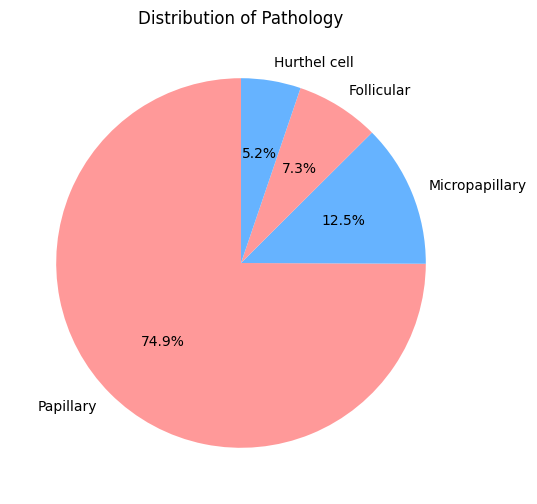

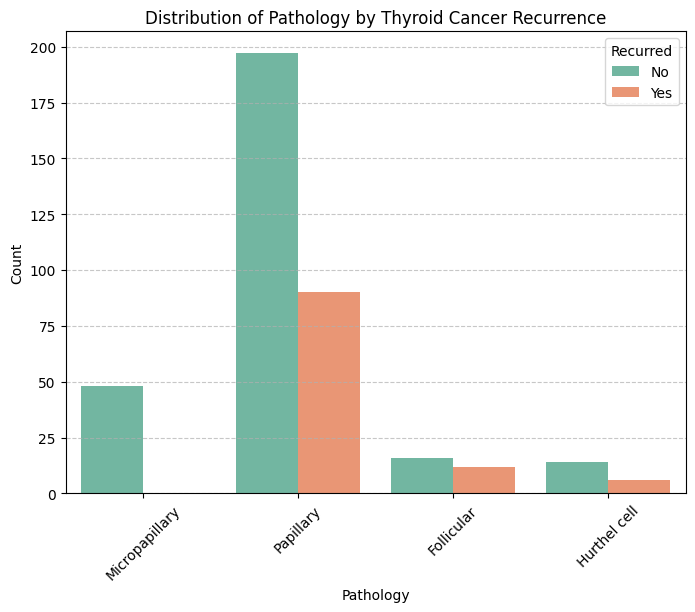

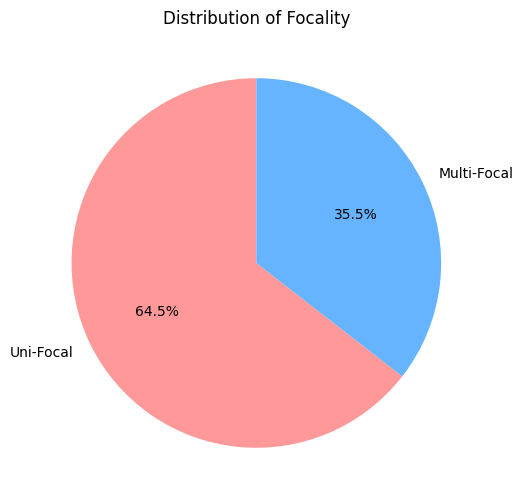

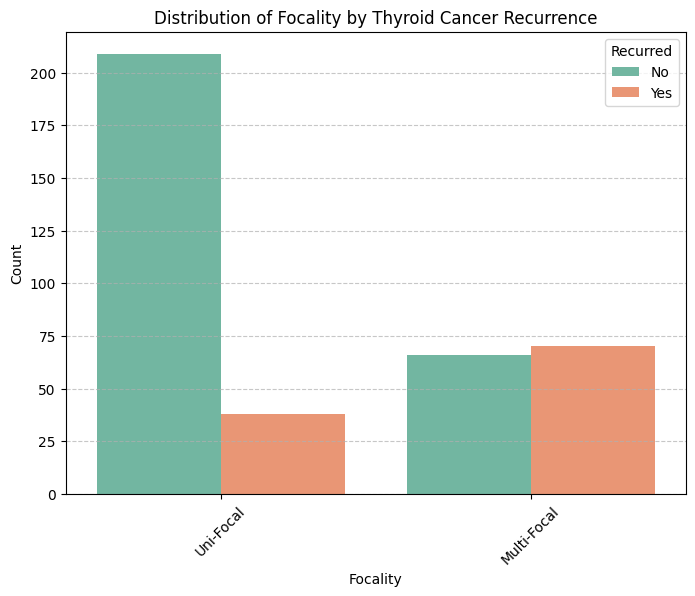

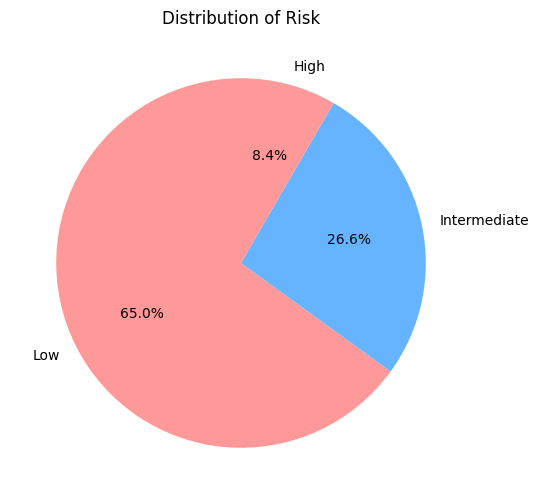

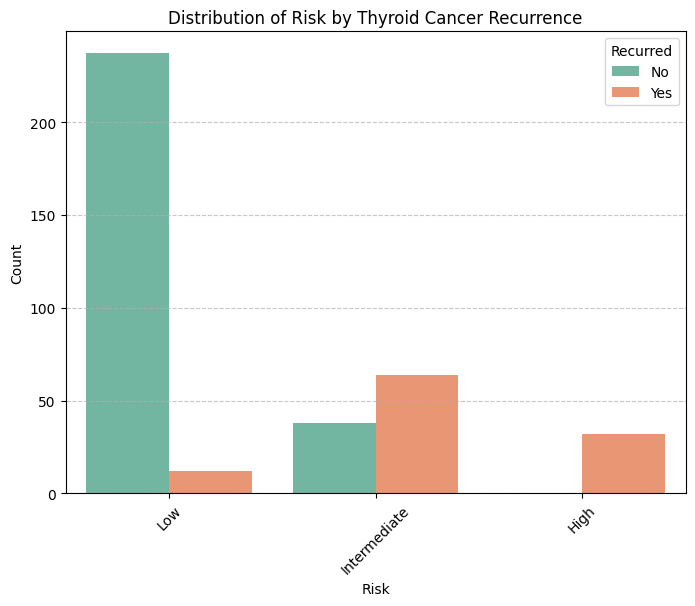

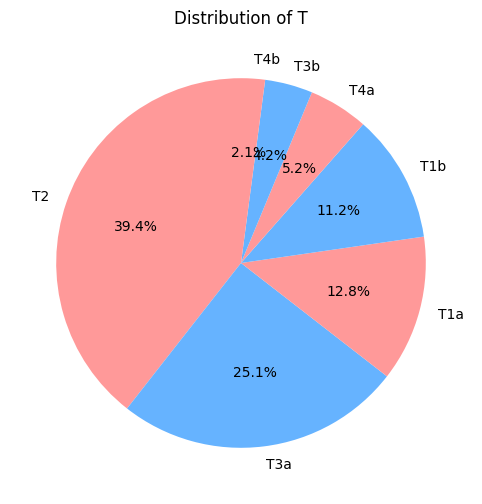

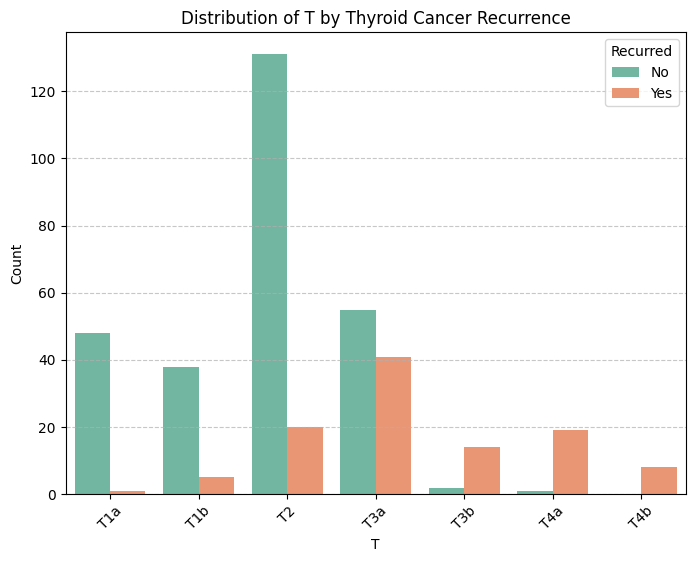

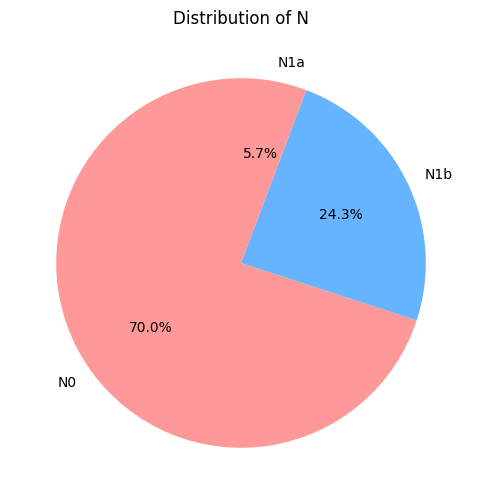

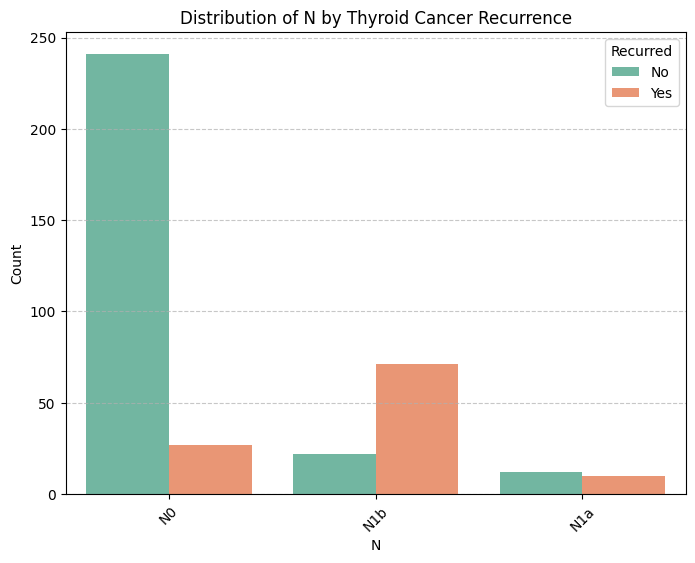

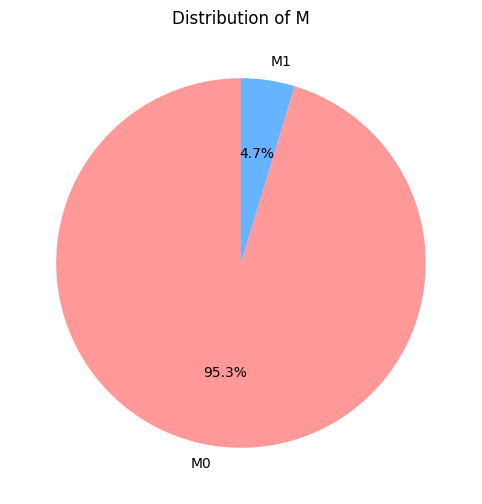

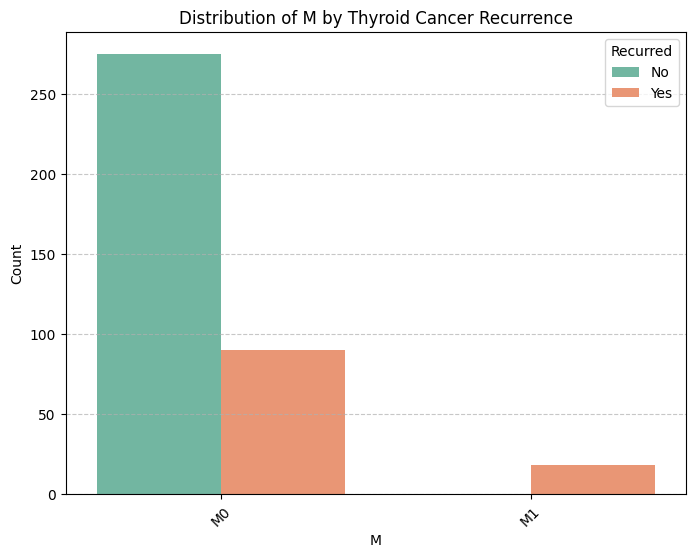

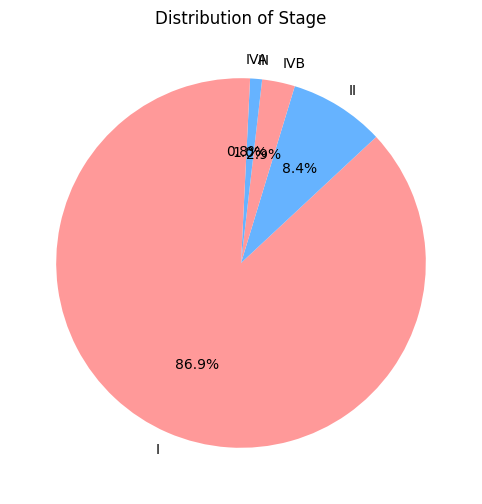

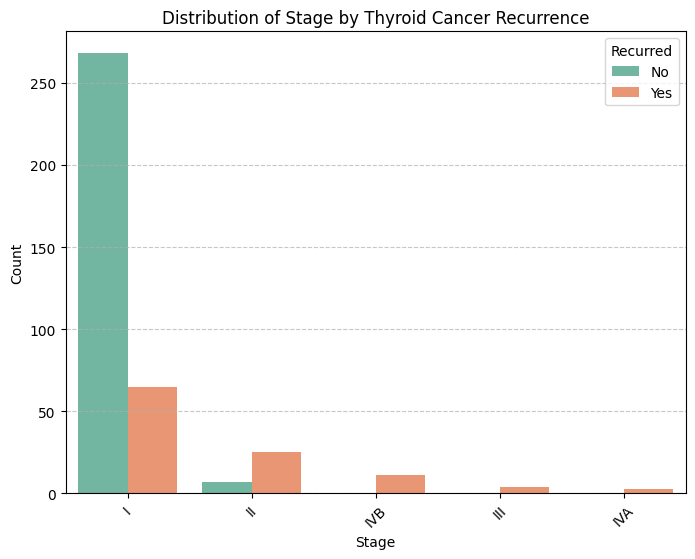

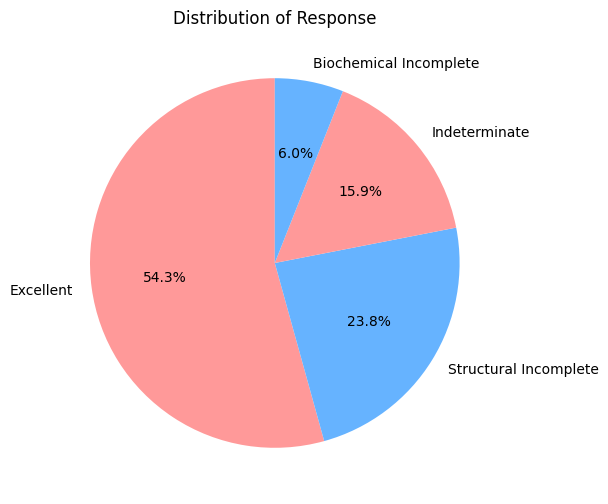

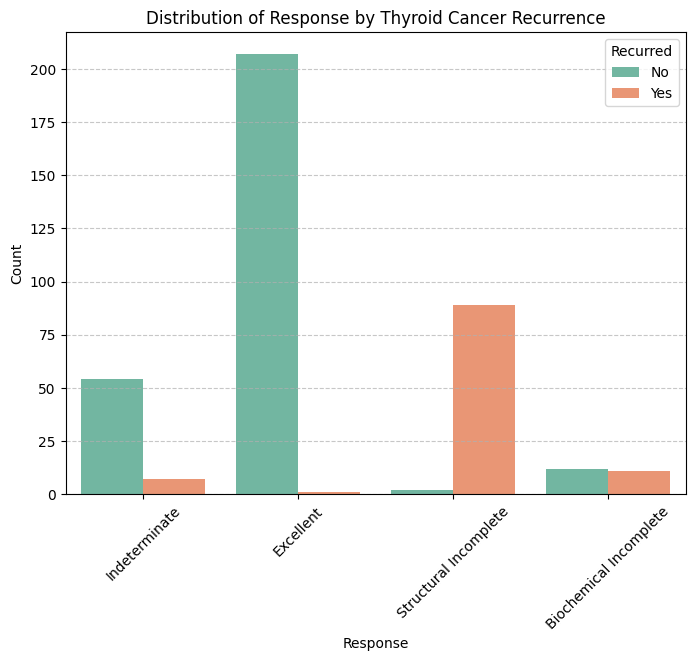

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical and categorical features
numerical_features = ['Age']
categorical_features = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
                        'Thyroid Function', 'Physical Examination', 'Adenopathy',
                        'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

# Create plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='Recurred', y=feature, palette='Set2')
    plt.title(f'Boxplot of {feature} by Thyroid Cancer Recurrence')
    plt.xlabel('Recurred')
    plt.ylabel(feature)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=feature, y='Recurred', hue='Recurred', palette='Set2', alpha=0.5)
    plt.title(f'Scatter plot of {feature} by Thyroid Cancer Recurrence')
    plt.xlabel(feature)
    plt.ylabel('Recurred')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x='Recurred', y=feature, palette='Set2')
    plt.title(f'Violin plot of {feature} by Thyroid Cancer Recurrence')
    plt.xlabel('Recurred')
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Create plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    data[feature].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
    plt.title(f'Distribution of {feature}')
    plt.ylabel('')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature, hue='Recurred', palette='Set2')
    plt.title(f'Distribution of {feature} by Thyroid Cancer Recurrence')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Recurred', loc='upper right')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Logistic Regression Accuracy: 0.935064935064935
Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.98      0.96        58
         Yes       0.94      0.79      0.86        19

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77



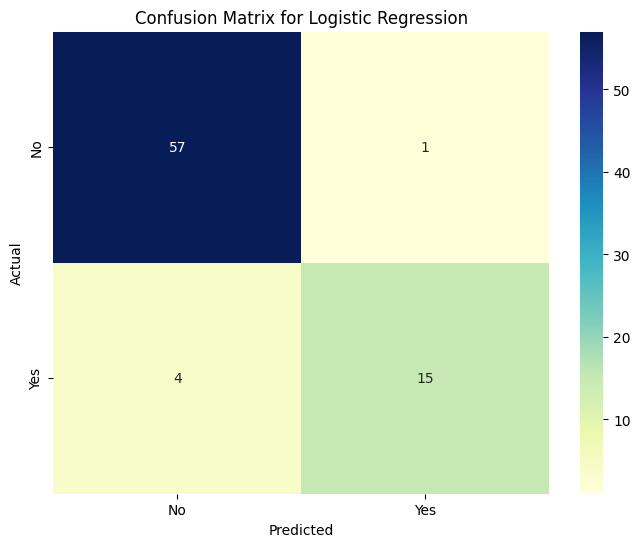

Decision Tree Accuracy: 0.935064935064935
Decision Tree Classification Report:
              precision    recall  f1-score   support

          No       0.98      0.93      0.96        58
         Yes       0.82      0.95      0.88        19

    accuracy                           0.94        77
   macro avg       0.90      0.94      0.92        77
weighted avg       0.94      0.94      0.94        77



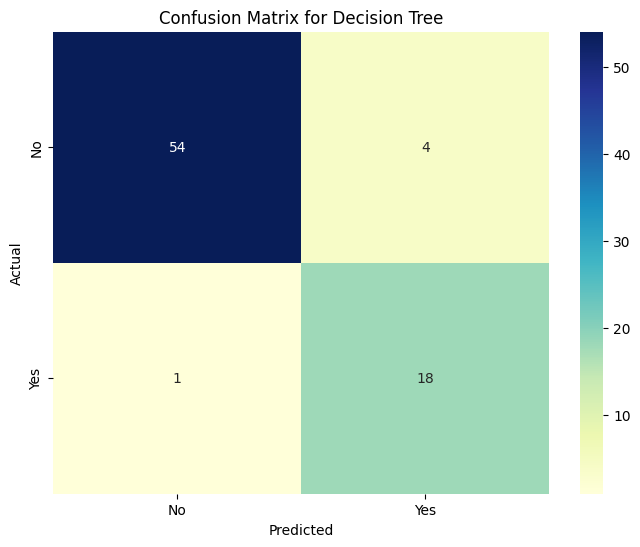

Random Forest Accuracy: 0.987012987012987
Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.98      1.00      0.99        58
         Yes       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



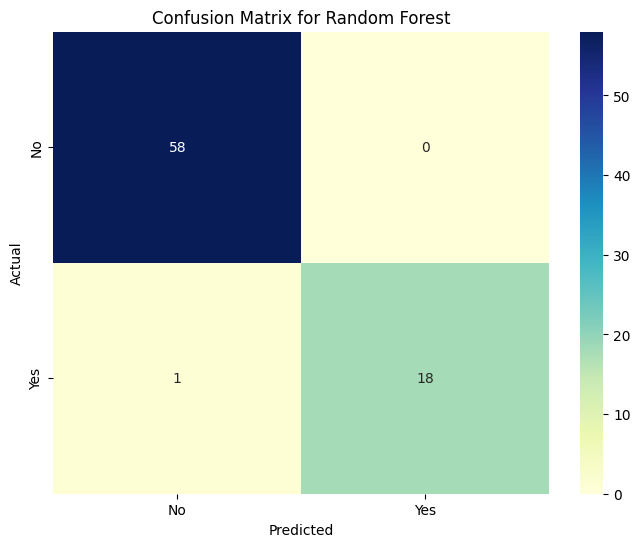

Gradient Boosting Accuracy: 0.974025974025974
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

          No       0.98      0.98      0.98        58
         Yes       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



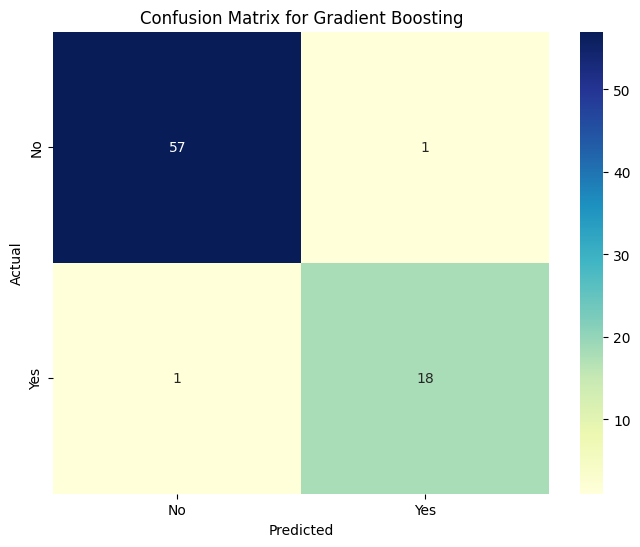

SVM Accuracy: 0.8441558441558441
SVM Classification Report:
              precision    recall  f1-score   support

          No       0.83      1.00      0.91        58
         Yes       1.00      0.37      0.54        19

    accuracy                           0.84        77
   macro avg       0.91      0.68      0.72        77
weighted avg       0.87      0.84      0.82        77



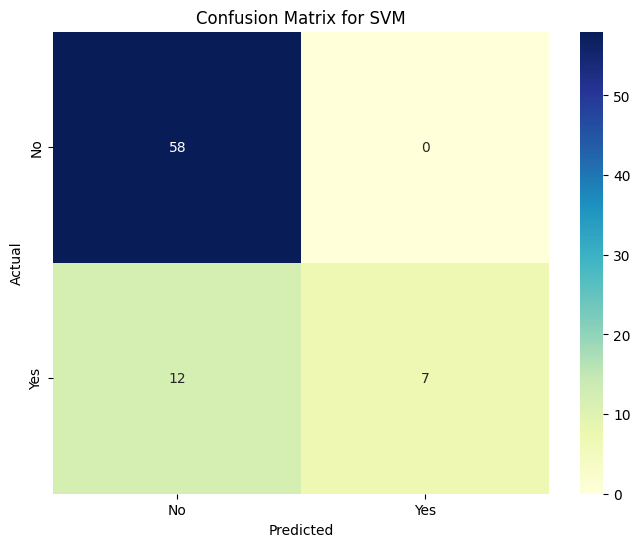

Neural Network Accuracy: 0.922077922077922
Neural Network Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.97      0.95        58
         Yes       0.88      0.79      0.83        19

    accuracy                           0.92        77
   macro avg       0.91      0.88      0.89        77
weighted avg       0.92      0.92      0.92        77



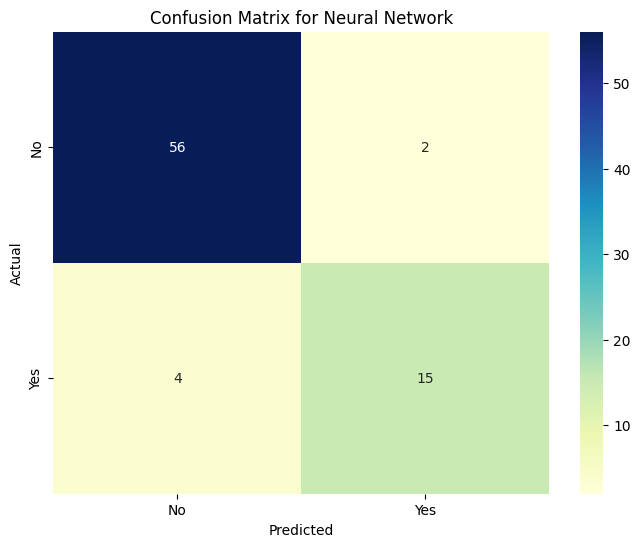

In [17]:

# Separate features (X) and target variable (y)
X = data.drop(columns=['Recurred'])  # Features
y = data['Recurred']  # Target variable

# Encode categorical variables (if any)
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

def train_models_with_plots(X_train, y_train, X_test, y_test):
    models = {}

    # Logistic Regression
    logistic_reg = LogisticRegression()
    logistic_reg.fit(X_train, y_train)
    models['Logistic Regression'] = logistic_reg

    # Decision Tree
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    models['Decision Tree'] = decision_tree

    # Random Forest
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    models['Random Forest'] = random_forest

    # Gradient Boosting Machines (GBM)
    gradient_boosting = GradientBoostingClassifier()
    gradient_boosting.fit(X_train, y_train)
    models['Gradient Boosting'] = gradient_boosting

    # Support Vector Machines (SVM)
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    models['SVM'] = svm_model

    # Neural Networks (MLP)
    mlp_classifier = MLPClassifier()
    mlp_classifier.fit(X_train, y_train)
    models['Neural Network'] = mlp_classifier

    # Plot evaluation metrics for each model
    for model_name, model in models.items():
        plt.figure(figsize=(8, 6))
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy:", accuracy)
        print(f"{model_name} Classification Report:")
        print(classification_report(y_test, y_pred))

        sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap="YlGnBu")
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

    return models

# Example usage:
models_with_plots = train_models_with_plots(X_train, y_train, X_test, y_test)